<a href="https://colab.research.google.com/github/tejas4466/Data-Science-Codes/blob/main/FA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FA2


Data set : Human Development Index

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy import stats

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset (2)/Human Development Index - Full.csv')
print(f"Dataset Shape: {df.shape}")


Dataset Shape: (195, 880)


In [ ]:
df


,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Human Development Index (1990),Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),...,Material footprint per capita (tonnes) (2012),Material footprint per capita (tonnes) (2013),Material footprint per capita (tonnes) (2014),Material footprint per capita (tonnes) (2015),Material footprint per capita (tonnes) (2016),Material footprint per capita (tonnes) (2017),Material footprint per capita (tonnes) (2018),Material footprint per capita (tonnes) (2019),Material footprint per capita (tonnes) (2020),Material footprint per capita (tonnes) (2021)
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,49.56,49.68,55.49,59.76,64.95,75.61,65.97,68.95,68.95,68.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,WSM,Samoa,High,EAP,111.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,YEM,Yemen,Low,AS,183.0,0.383,0.386,0.391,0.397,0.399,...,3.66,3.60,3.55,3.39,3.48,3.06,2.84,2.89,2.89,2.89
192,ZAF,South Africa,High,SSA,109.0,0.632,0.641,0.647,0.652,0.658,...,9.55,10.09,8.41,8.06,7.55,7.76,7.60,7.55,7.55,7.55
193,ZMB,Zambia,Medium,SSA,154.0,0.412,0.408,0.408,0.414,0.411,...,4.74,4.68,3.92,3.36,3.12,3.21,2.80,2.38,2.38,2.38


In [ ]:
print(df.head())

  ISO3               Country Human Development Groups UNDP Developing Regions  \
0  AFG           Afghanistan                      Low                      SA   
1  AGO                Angola                   Medium                     SSA   
2  ALB               Albania                     High                     ECA   
3  AND               Andorra                Very High                     NaN   
4  ARE  United Arab Emirates                Very High                      AS   

   HDI Rank (2021)  Human Development Index (1990)  \
0            180.0                           0.273   
1            148.0                             NaN   
2             67.0                           0.647   
3             40.0                             NaN   
4             26.0                           0.728   

   Human Development Index (1991)  Human Development Index (1992)  \
0                           0.279                           0.287   
1                             NaN                 

In [ ]:
df.isnull().sum()

,0
ISO3,0
Country,0
Human Development Groups,4
UNDP Developing Regions,44
HDI Rank (2021),4
...,...
Material footprint per capita (tonnes) (2017),38
Material footprint per capita (tonnes) (2018),38
Material footprint per capita (tonnes) (2019),38
Material footprint per capita (tonnes) (2020),38


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 880 entries, ISO3 to Material footprint per capita (tonnes) (2021)
dtypes: float64(876), object(4)
memory usage: 1.3+ MB


In [ ]:
data_cleaned = df.drop(['UNDP Developing Regions','Material footprint per capita (tonnes) (2017)','Material footprint per capita (tonnes) (2019)','Material footprint per capita (tonnes) (2020)','Material footprint per capita (tonnes) (2021)'],axis=1)

In [ ]:
data_cleaned.columns=data_cleaned.columns.str.lower().str.replace(' ', '_')

In [ ]:
print(data_cleaned.columns)

Index(['iso3', 'country', 'human_development_groups', 'hdi_rank_(2021)',
       'human_development_index_(1990)', 'human_development_index_(1991)',
       'human_development_index_(1992)', 'human_development_index_(1993)',
       'human_development_index_(1994)', 'human_development_index_(1995)',
       ...
       'material_footprint_per_capita_(tonnes)_(2008)',
       'material_footprint_per_capita_(tonnes)_(2009)',
       'material_footprint_per_capita_(tonnes)_(2010)',
       'material_footprint_per_capita_(tonnes)_(2011)',
       'material_footprint_per_capita_(tonnes)_(2012)',
       'material_footprint_per_capita_(tonnes)_(2013)',
       'material_footprint_per_capita_(tonnes)_(2014)',
       'material_footprint_per_capita_(tonnes)_(2015)',
       'material_footprint_per_capita_(tonnes)_(2016)',
       'material_footprint_per_capita_(tonnes)_(2018)'],
      dtype='object', length=875)


In [ ]:
data_cleaned.head(4)


,iso3,country,human_development_groups,hdi_rank_(2021),human_development_index_(1990),human_development_index_(1991),human_development_index_(1992),human_development_index_(1993),human_development_index_(1994),human_development_index_(1995),...,material_footprint_per_capita_(tonnes)_(2008),material_footprint_per_capita_(tonnes)_(2009),material_footprint_per_capita_(tonnes)_(2010),material_footprint_per_capita_(tonnes)_(2011),material_footprint_per_capita_(tonnes)_(2012),material_footprint_per_capita_(tonnes)_(2013),material_footprint_per_capita_(tonnes)_(2014),material_footprint_per_capita_(tonnes)_(2015),material_footprint_per_capita_(tonnes)_(2016),material_footprint_per_capita_(tonnes)_(2018)
0,AFG,Afghanistan,Low,180.0,0.273,0.279,0.287,0.297,0.292,0.310,...,1.38,1.43,1.77,2.12,1.86,1.88,1.66,1.62,1.66,1.32
1,AGO,Angola,Medium,148.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.95,5.58,4.16,4.39,4.09,4.53,3.97,3.59,2.79,2.28
2,ALB,Albania,High,67.0,0.647,0.629,0.614,0.617,0.624,0.634,...,13.46,14.50,11.92,12.49,12.44,11.49,13.14,12.61,14.39,12.85
3,AND,Andorra,Very High,40.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_cleaned["human_development_groups"] = data_cleaned["human_development_groups"].fillna(0)
data_cleaned["hdi_rank_(2021)"] = data_cleaned["hdi_rank_(2021)"].fillna(0)
data_cleaned["human_development_index_(1990)"] = data_cleaned["human_development_index_(1990)"].fillna(0)


In [ ]:
data_cleaned.info


<bound method DataFrame.info of     iso3               country human_development_groups  hdi_rank_(2021)  \
0    AFG           Afghanistan                      Low            180.0   
1    AGO                Angola                   Medium            148.0   
2    ALB               Albania                     High             67.0   
3    AND               Andorra                Very High             40.0   
4    ARE  United Arab Emirates                Very High             26.0   
..   ...                   ...                      ...              ...   
190  WSM                 Samoa                     High            111.0   
191  YEM                 Yemen                      Low            183.0   
192  ZAF          South Africa                     High            109.0   
193  ZMB                Zambia                   Medium            154.0   
194  ZWE              Zimbabwe                   Medium            146.0   

     human_development_index_(1990)  human_development_index_(1991)  \
0                             0.273                           0.279   
1                             0.000                             NaN   
2                             0.647                           0.629   
3                             0.000                             NaN   
4                             0.728                           0.739   
..                              ...                             ...   
190                           0.000                             NaN   
191                           0.383                           0.386   
192                           0.632                           0.641   
193                           0.412                           0.408   
194                           0.509                           0.512   

     human_development_index_(1992)  human_development_index_(1993)  \
0                             0.287                           0.297   
1                               NaN                             NaN   
2                             0.614                           0.617   
3                               NaN                             NaN   
4                             0.742                           0.748   
..                              ...                             ...   
190                             NaN                             NaN   
191                           0.391                           0.397   
192                           0.647                           0.652   
193                           0.408                           0.414   
194                           0.498                           0.491   

     human_development_index_(1994)  human_development_index_(1995)  ...  \
0                             0.292                           0.310  ...   
1                               NaN                             NaN  ...   
2                             0.624                           0.634  ...   
3                               NaN                             NaN  ...   
4                             0.755                           0.762  ...   
..                              ...                             ...  ...   
190                             NaN                           0.659  ...   
191                           0.399                           0.409  ...   
192                           0.658                           0.661  ...   
193                           0.411                           0.413  ...   
194                           0.486                           0.477  ...   

     material_footprint_per_capita_(tonnes)_(2008)  \
0                                             1.38   
1                                             4.95   
2                                            13.46   
3                                              NaN   
4                                            57.47   
..                                             ...   
190                                            NaN   
191 

In [ ]:
data_cleaned.isnull().sum()

,0
iso3,0
country,0
human_development_groups,0
hdi_rank_(2021),0
human_development_index_(1990),0
...,...
material_footprint_per_capita_(tonnes)_(2013),38
material_footprint_per_capita_(tonnes)_(2014),38
material_footprint_per_capita_(tonnes)_(2015),38
material_footprint_per_capita_(tonnes)_(2016),38


In [ ]:
data_cleaned["material_footprint_per_capita_(tonnes)_(2013)"] = data_cleaned["material_footprint_per_capita_(tonnes)_(2013)"].fillna(0)
data_cleaned["material_footprint_per_capita_(tonnes)_(2014)"] = data_cleaned["material_footprint_per_capita_(tonnes)_(2014)"].fillna(0)
data_cleaned["material_footprint_per_capita_(tonnes)_(2015)"] = data_cleaned["material_footprint_per_capita_(tonnes)_(2015)"].fillna(0)
data_cleaned["material_footprint_per_capita_(tonnes)_(2016)"] = data_cleaned["material_footprint_per_capita_(tonnes)_(2016)"].fillna(0)
data_cleaned["material_footprint_per_capita_(tonnes)_(2018)"] = data_cleaned["material_footprint_per_capita_(tonnes)_(2018)"].fillna(0)

In [ ]:
data_cleaned.isnull().sum()

,0
iso3,0
country,0
human_development_groups,0
hdi_rank_(2021),0
human_development_index_(1990),0
...,...
material_footprint_per_capita_(tonnes)_(2013),0
material_footprint_per_capita_(tonnes)_(2014),0
material_footprint_per_capita_(tonnes)_(2015),0
material_footprint_per_capita_(tonnes)_(2016),0


In [ ]:
data_cleaned.dtypes

,0
iso3,object
country,object
human_development_groups,object
hdi_rank_(2021),float64
human_development_index_(1990),float64
...,...
material_footprint_per_capita_(tonnes)_(2013),float64
material_footprint_per_capita_(tonnes)_(2014),float64
material_footprint_per_capita_(tonnes)_(2015),float64
material_footprint_per_capita_(tonnes)_(2016),float64


In [ ]:
df_clean = df.copy()

    # Replace '..' with NaN
df_clean = df_clean.replace('NaN', np.nan)

    # Convert numeric columns to float
numeric_columns = df_clean.select_dtypes(include=['object']).columns
for col in numeric_columns:
    try:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    except:
      continue

    # Handle missing values
    numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns
df_clean[numeric_columns] = df_clean[numeric_columns].fillna(df_clean[numeric_columns].mean())
df_clean

,ISO3,Country,Human Development Groups,UNDP Developing Regions,HDI Rank (2021),Human Development Index (1990),Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),...,Material footprint per capita (tonnes) (2012),Material footprint per capita (tonnes) (2013),Material footprint per capita (tonnes) (2014),Material footprint per capita (tonnes) (2015),Material footprint per capita (tonnes) (2016),Material footprint per capita (tonnes) (2017),Material footprint per capita (tonnes) (2018),Material footprint per capita (tonnes) (2019),Material footprint per capita (tonnes) (2020),Material footprint per capita (tonnes) (2021)
0,NaN,NaN,NaN,NaN,180.0,0.273000,0.279000,0.287000,0.297000,0.292000,...,1.86000,1.88000,1.660000,1.620000,1.660000,1.410000,1.32,1.38000,1.38000,1.38000
1,NaN,NaN,NaN,NaN,148.0,0.599277,0.601979,0.604525,0.608504,0.613411,...,4.09000,4.53000,3.970000,3.590000,2.790000,2.640000,2.28,2.18000,2.18000,2.18000
2,NaN,NaN,NaN,NaN,67.0,0.647000,0.629000,0.614000,0.617000,0.624000,...,12.44000,11.49000,13.140000,12.610000,14.390000,14.460000,12.85,12.96000,12.96000,12.96000
3,NaN,NaN,NaN,NaN,40.0,0.599277,0.601979,0.604525,0.608504,0.613411,...,15.55535,15.67586,15.631146,15.637707,15.637834,15.798089,14.84,15.01949,15.01949,15.01949
4,NaN,NaN,NaN,NaN,26.0,0.728000,0.739000,0.742000,0.748000,0.755000,...,49.56000,49.68000,55.490000,59.760000,64.950000,75.610000,65.97,68.95000,68.95000,68.95000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,NaN,NaN,NaN,NaN,111.0,0.599277,0.601979,0.604525,0.608504,0.613411,...,15.55535,15.67586,15.631146,15.637707,15.637834,15.798089,14.84,15.01949,15.01949,15.01949
191,NaN,NaN,NaN,NaN,183.0,0.383000,0.386000,0.391000,0.397000,0.399000,...,3.66000,3.60000,3.550000,3.390000,3.480000,3.060000,2.84,2.89000,2.89000,2.89000
192,NaN,NaN,NaN,NaN,109.0,0.632000,0.641000,0.647000,0.652000,0.658000,...,9.55000,10.09000,8.410000,8.060000,7.550000,7.760000,7.60,7.55000,7.55000,7.55000
193,NaN,NaN,NaN,NaN,154.0,0.412000,0.408000,0.408000,0.414000,0.411000,...,4.74000,4.68000,3.920000,3.360000,3.120000,3.210000,2.80,2.38000,2.38000,2.38000


In [ ]:
def clean_data(df):
    # Create a copy
    df_clean = df.copy()

    # Replace '..' with NaN
    df_clean = df_clean.replace('..', np.nan)

    # Convert numeric columns to float
    numeric_columns = df_clean.select_dtypes(include=['object']).columns
    for col in numeric_columns:
        try:
            df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        except:
            continue

    # Handle missing values
    numeric_columns = df_clean.select_dtypes(include=['float64', 'int64']).columns
    df_clean[numeric_columns] = df_clean[numeric_columns].fillna(df_clean[numeric_columns].mean())

    return df_clean

# Clean the data
df_cleaned = clean_data(df)

# Select key features for analysis
key_features = [
    'Human Development Index (2021)',
    'Life Expectancy at Birth (2021)',
    'Expected Years of Schooling (2021)',
    'Mean Years of Schooling (2021)',
    'Gross National Income Per Capita (2021)'
]

In [ ]:
analysis_df = df_cleaned[key_features]

scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(analysis_df),
    columns=analysis_df.columns,
    index=analysis_df.index
)

In [ ]:
normalizer = MinMaxScaler()
df_normalized = pd.DataFrame(
    normalizer.fit_transform(analysis_df),
    columns=analysis_df.columns,
    index=analysis_df.index
)

In [ ]:
print("\nStandardized Data:")
display(df_scaled.head())
print("\nNormalized Data:")
display(df_normalized.head())

# Statistical Analysis
stats_dict = {
    'Mean': analysis_df.mean(),
    'Median': analysis_df.median(),
    'Mode': analysis_df.mode().iloc[0],
    'Std': analysis_df.std(),
    'Variance': analysis_df.var(),
    'Q1': analysis_df.quantile(0.25),
    'Q3': analysis_df.quantile(0.75),
    'IQR': analysis_df.quantile(0.75) - analysis_df.quantile(0.25)
}


Standardized Data:


,Human Development Index (2021),Life Expectancy at Birth (2021),Expected Years of Schooling (2021),Mean Years of Schooling (2021),Gross National Income Per Capita (2021)
0,-1.631129,-1.202849,-1.121274,-1.915845,-0.848255
1,-0.904916,-1.246723,-0.462304,-1.139426,-0.679577
2,0.507167,0.671223,0.323623,0.734034,-0.278176
3,0.924067,1.176723,-0.072728,0.500585,1.437378
4,1.280450,0.962140,0.762080,1.183345,1.965770



Normalized Data:


,Human Development Index (2021),Life Expectancy at Birth (2021),Expected Years of Schooling (2021),Mean Years of Schooling (2021),Gross National Income Per Capita (2021)
0,0.161179,0.282967,0.304365,0.072654,0.007477
1,0.348354,0.272823,0.427382,0.275754,0.032402
2,0.712305,0.716234,0.574100,0.765822,0.091715
3,0.819757,0.833101,0.500109,0.704756,0.345213
4,0.911612,0.783492,0.655952,0.883355,0.423290



Basic Statistics:


,Mean,Median,Mode,Std,Variance,Q1,Q3,IQR
Human Development Index (2021),0.720576,0.73100,0.720576,0.149099,2.223061e-02,0.604500,0.831500,0.227000
Life Expectancy at Birth (2021),71.276330,71.69400,52.525400,7.746488,6.000808e+01,65.672500,76.699300,11.026800
Expected Years of Schooling (2021),13.510846,13.40492,13.510846,2.903270,8.428977e+00,11.601258,15.583790,3.982532
Mean Years of Schooling (2021),8.986916,9.22105,8.986916,3.140804,9.864653e+00,6.330309,11.410855,5.080546
Gross National Income Per Capita (2021),20136.391499,12349.28600,20136.391499,21643.652029,4.684477e+08,4592.919612,29514.888380,24921.968768


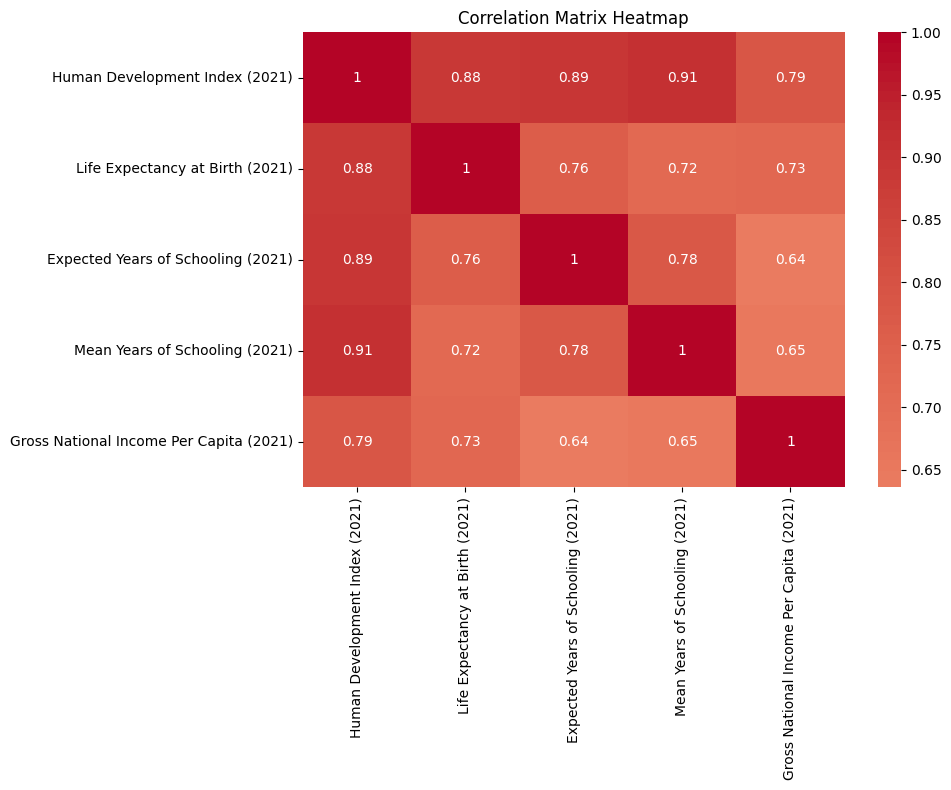

In [ ]:
stats_df = pd.DataFrame(stats_dict)
print("\nBasic Statistics:")
display(stats_df)

# Visualizations
# 1. Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = analysis_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


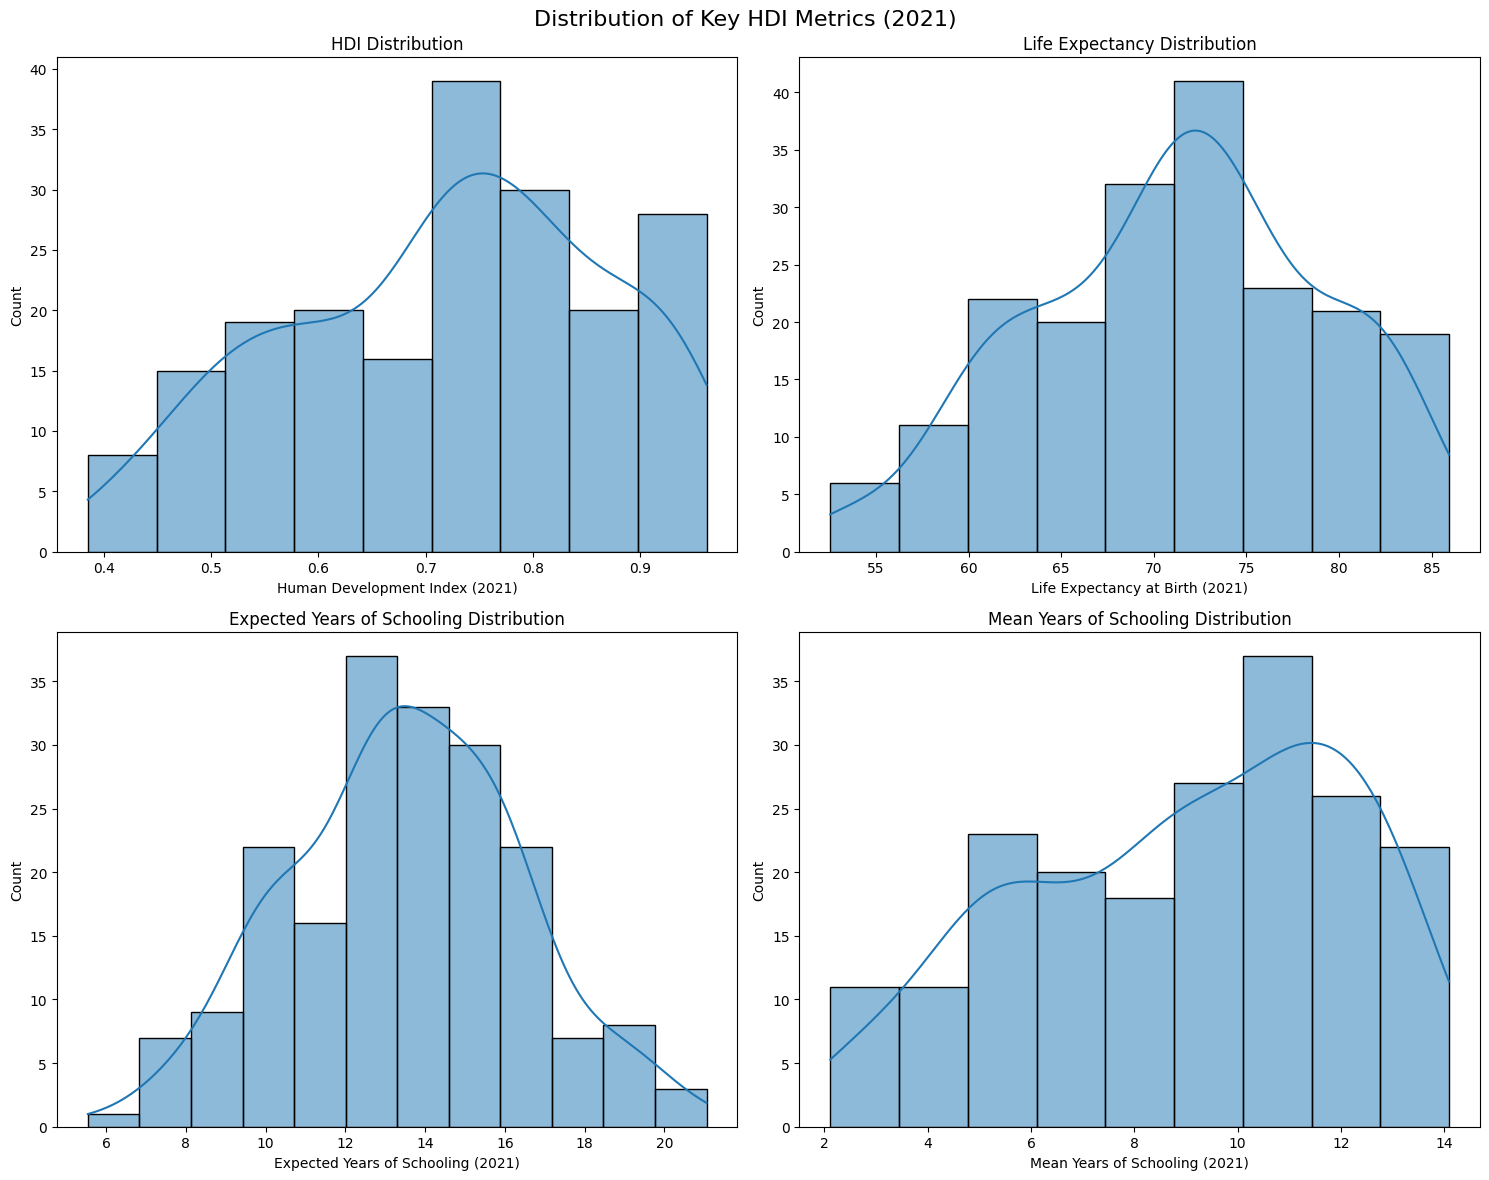

In [ ]:

# 2. Distribution Plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key HDI Metrics (2021)', size=16)

sns.histplot(data=analysis_df['Human Development Index (2021)'], kde=True, ax=axes[0,0])
axes[0,0].set_title('HDI Distribution')

sns.histplot(data=analysis_df['Life Expectancy at Birth (2021)'], kde=True, ax=axes[0,1])
axes[0,1].set_title('Life Expectancy Distribution')

sns.histplot(data=analysis_df['Expected Years of Schooling (2021)'], kde=True, ax=axes[1,0])
axes[1,0].set_title('Expected Years of Schooling Distribution')

sns.histplot(data=analysis_df['Mean Years of Schooling (2021)'], kde=True, ax=axes[1,1])
axes[1,1].set_title('Mean Years of Schooling Distribution')

plt.tight_layout()
plt.show()


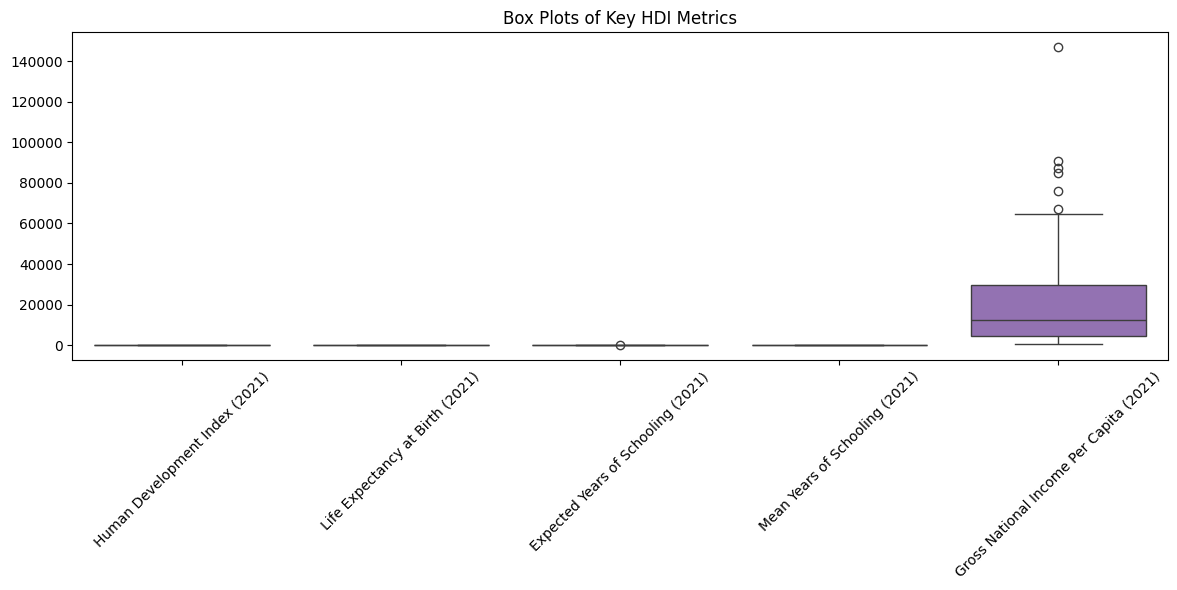

In [ ]:

# 3. Box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=analysis_df)
plt.title('Box Plots of Key HDI Metrics')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


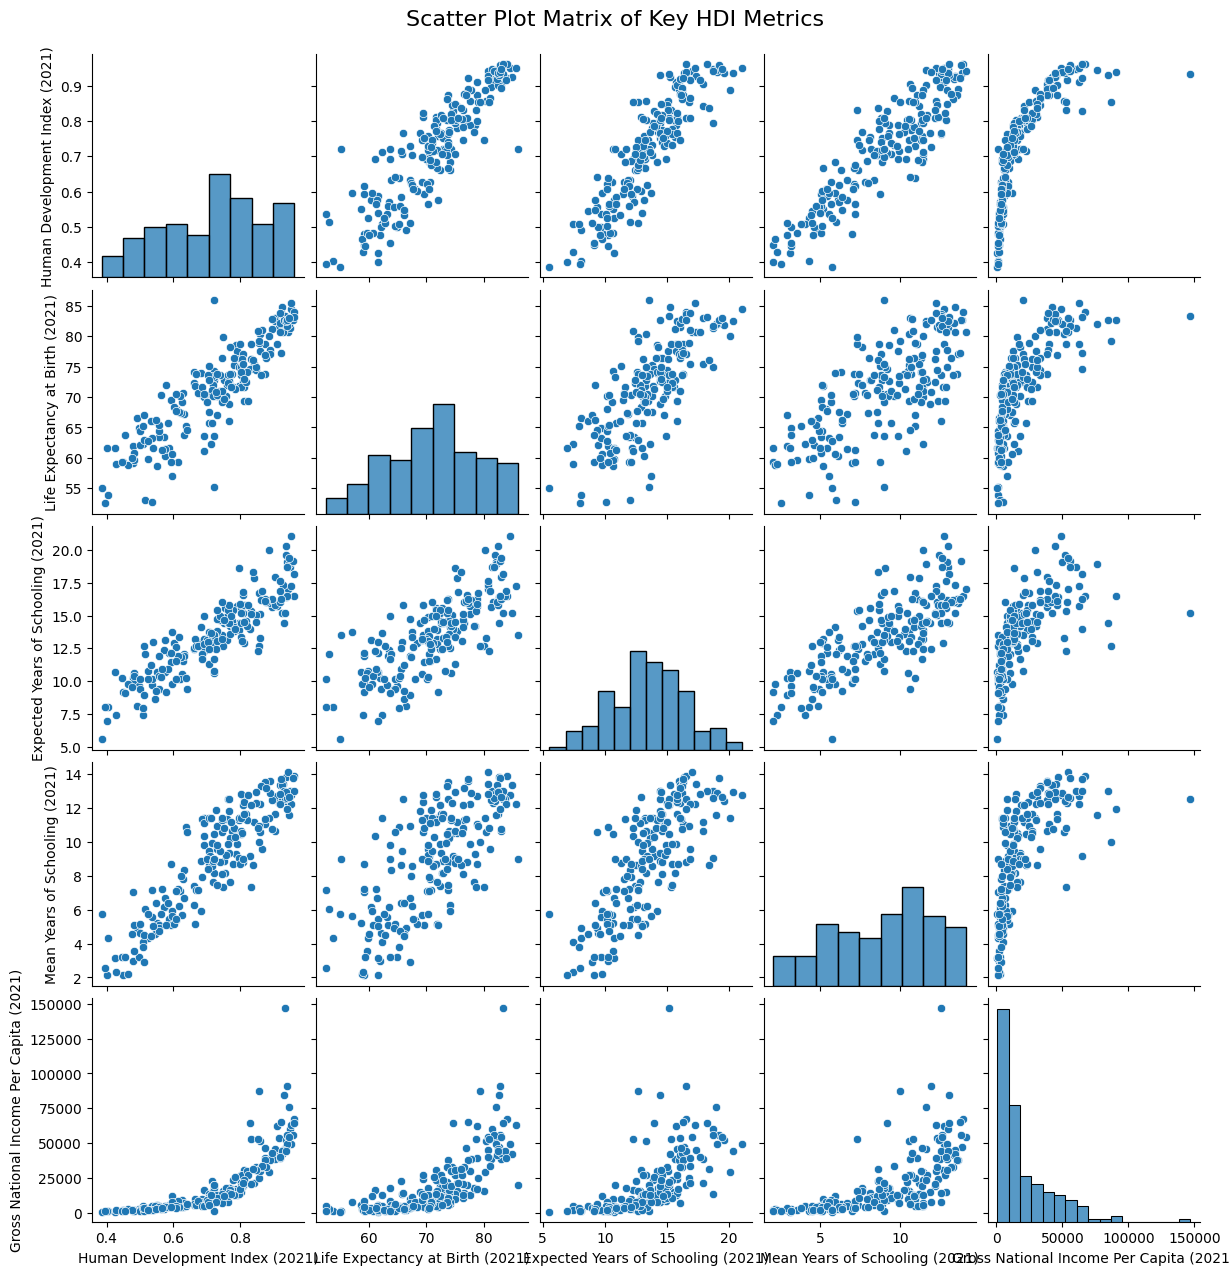

In [ ]:

# 4. Pair Plot
sns.pairplot(analysis_df)
plt.suptitle('Scatter Plot Matrix of Key HDI Metrics', y=1.02, size=16)
plt.show()


In [ ]:
# Normal Distribution Analysis
def analyze_distribution(df, column):
    data = df[column].dropna()

    mean = np.mean(data)
    std = np.std(data)

    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True)
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean:.2f}')
    plt.axvline(mean + std, color='green', linestyle='dashed', linewidth=2, label=f'Mean + SD = {(mean + std):.2f}')
    plt.axvline(mean - std, color='green', linestyle='dashed', linewidth=2, label=f'Mean - SD = {(mean - std):.2f}')
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()

    return {'mean': mean, 'std': std}


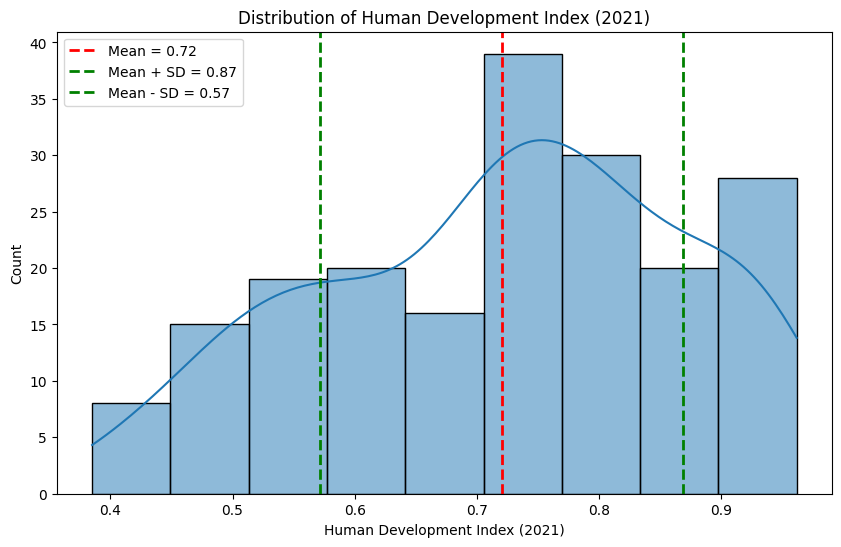


HDI Distribution Statistics:
{'mean': 0.7205759162303664, 'std': 0.1487165372697707}


In [ ]:


# Analyze distribution for HDI
hdi_stats = analyze_distribution(analysis_df, 'Human Development Index (2021)')
print("\nHDI Distribution Statistics:")
print(hdi_stats)

In [ ]:
hdi_columns = df.columns[6:37]  # Adjust as needed if the first column is a non-numeric (like 'Country')
analysis_df = df[hdi_columns]

# Standardize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(analysis_df), columns=hdi_columns)

print("\nStandardized Data:")
display(df_scaled.head())

# Normalize the data
normalizer = MinMaxScaler()
df_normalized = pd.DataFrame(normalizer.fit_transform(analysis_df), columns=hdi_columns)

print("\nNormalized Data:")
display(df_normalized.head())

# Perform statistical analysis
stats_dict = {
    'Mean': analysis_df.mean(),
    'Median': analysis_df.median(),
    'Mode': analysis_df.mode().iloc[0],
    'Std': analysis_df.std(),
    'Variance': analysis_df.var(),
    'Q1': analysis_df.quantile(0.25),
    'Q3': analysis_df.quantile(0.75),
    'IQR': analysis_df.quantile(0.75) - analysis_df.quantile(0.25)
}

# Convert stats_dict to a DataFrame for better visualization
stats_df = pd.DataFrame(stats_dict)
print("\nStatistical Analysis:")
display(stats_df)


Standardized Data:


,Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),Human Development Index (1995),Human Development Index (1996),Human Development Index (1997),Human Development Index (1998),Human Development Index (1999),Human Development Index (2000),...,Human Development Index (2012),Human Development Index (2013),Human Development Index (2014),Human Development Index (2015),Human Development Index (2016),Human Development Index (2017),Human Development Index (2018),Human Development Index (2019),Human Development Index (2020),Human Development Index (2021)
0,-1.975201,-1.937636,-1.889412,-1.940884,-1.870667,-1.842622,-1.840484,-1.857375,-1.766001,-1.777314,...,-1.526374,-1.506434,-1.509835,-1.546587,-1.555508,-1.573390,-1.602374,-1.596425,-1.600553,-1.614313
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.577371,-1.540497,...,-1.035927,-0.995895,-0.957127,-0.859972,-0.794490,-0.811690,-0.857476,-0.883192,-0.882556,-0.895586
2,0.165251,0.057820,0.051535,0.063941,0.099576,0.131169,0.080710,0.137424,0.220506,0.247466,...,0.513885,0.529176,0.549661,0.546269,0.542256,0.546123,0.545860,0.549940,0.486335,0.501938
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.082244,...,1.108961,1.046260,1.069470,1.021619,1.025338,0.983273,0.984818,0.969881,0.848689,0.914541
4,0.837964,0.838916,0.846110,0.855001,0.877944,0.869827,0.869664,0.868252,0.916078,0.951995,...,0.958557,0.967716,0.990511,1.008414,1.018720,1.175354,1.230900,1.283170,1.278145,1.267249



Normalized Data:


,Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),Human Development Index (1995),Human Development Index (1996),Human Development Index (1997),Human Development Index (1998),Human Development Index (1999),Human Development Index (2000),...,Human Development Index (2012),Human Development Index (2013),Human Development Index (2014),Human Development Index (2015),Human Development Index (2016),Human Development Index (2017),Human Development Index (2018),Human Development Index (2019),Human Development Index (2020),Human Development Index (2021)
0,0.093130,0.099085,0.107198,0.092025,0.111283,0.118012,0.116822,0.106416,0.113707,0.112135,...,0.189189,0.190801,0.187285,0.176471,0.171030,0.161687,0.155203,0.166960,0.169284,0.161179
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163551,0.173579,...,0.315878,0.323680,0.331615,0.356401,0.371728,0.363796,0.352734,0.355009,0.356021,0.348354
2,0.627481,0.597561,0.597243,0.601227,0.612056,0.624224,0.613707,0.627543,0.638629,0.637481,...,0.716216,0.720613,0.725086,0.724913,0.724258,0.724077,0.724868,0.732865,0.712042,0.712305
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.854071,...,0.869932,0.855196,0.860825,0.849481,0.851658,0.840070,0.841270,0.843585,0.806283,0.819757
4,0.795420,0.792683,0.797856,0.802147,0.809892,0.813665,0.817757,0.818466,0.822430,0.820276,...,0.831081,0.834753,0.840206,0.846021,0.849913,0.891037,0.906526,0.926186,0.917976,0.911612



Statistical Analysis:


,Mean,Median,Mode,Std,Variance,Q1,Q3,IQR
Human Development Index (1991),0.601979,0.6290,0.408,0.164100,0.026929,0.48400,0.72900,0.24500
Human Development Index (1992),0.604525,0.6270,0.319,0.164457,0.027046,0.48500,0.72700,0.24200
Human Development Index (1993),0.608504,0.6340,0.663,0.165456,0.027376,0.48500,0.73100,0.24600
Human Development Index (1994),0.613411,0.6390,0.369,0.166191,0.027619,0.48600,0.74100,0.25500
Human Development Index (1995),0.617625,0.6465,0.679,0.164990,0.027222,0.48675,0.74525,0.25850
Human Development Index (1996),0.623336,0.6530,0.782,0.165710,0.027460,0.49075,0.75200,0.26125
Human Development Index (1997),0.628599,0.6580,0.660,0.166592,0.027753,0.49200,0.75925,0.26725
Human Development Index (1998),0.634059,0.6645,0.666,0.167486,0.028052,0.49300,0.76700,0.27400
Human Development Index (1999),0.631592,0.6630,0.671,0.170187,0.028964,0.48200,0.77300,0.29100
Human Development Index (2000),0.635201,0.6665,0.633,0.169395,0.028695,0.48725,0.76525,0.27800



Standardized Data:


,Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),Human Development Index (1995),Human Development Index (1996),Human Development Index (1997),Human Development Index (1998),Human Development Index (1999),Human Development Index (2000),...,Human Development Index (2012),Human Development Index (2013),Human Development Index (2014),Human Development Index (2015),Human Development Index (2016),Human Development Index (2017),Human Development Index (2018),Human Development Index (2019),Human Development Index (2020),Human Development Index (2021)
0,-1.975201,-1.937636,-1.889412,-1.940884,-1.870667,-1.842622,-1.840484,-1.857375,-1.766001,-1.777314,...,-1.526374,-1.506434,-1.509835,-1.546587,-1.555508,-1.573390,-1.602374,-1.596425,-1.600553,-1.614313
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.577371,-1.540497,...,-1.035927,-0.995895,-0.957127,-0.859972,-0.794490,-0.811690,-0.857476,-0.883192,-0.882556,-0.895586
2,0.165251,0.057820,0.051535,0.063941,0.099576,0.131169,0.080710,0.137424,0.220506,0.247466,...,0.513885,0.529176,0.549661,0.546269,0.542256,0.546123,0.545860,0.549940,0.486335,0.501938
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.082244,...,1.108961,1.046260,1.069470,1.021619,1.025338,0.983273,0.984818,0.969881,0.848689,0.914541
4,0.837964,0.838916,0.846110,0.855001,0.877944,0.869827,0.869664,0.868252,0.916078,0.951995,...,0.958557,0.967716,0.990511,1.008414,1.018720,1.175354,1.230900,1.283170,1.278145,1.267249



Normalized Data:


,Human Development Index (1991),Human Development Index (1992),Human Development Index (1993),Human Development Index (1994),Human Development Index (1995),Human Development Index (1996),Human Development Index (1997),Human Development Index (1998),Human Development Index (1999),Human Development Index (2000),...,Human Development Index (2012),Human Development Index (2013),Human Development Index (2014),Human Development Index (2015),Human Development Index (2016),Human Development Index (2017),Human Development Index (2018),Human Development Index (2019),Human Development Index (2020),Human Development Index (2021)
0,0.093130,0.099085,0.107198,0.092025,0.111283,0.118012,0.116822,0.106416,0.113707,0.112135,...,0.189189,0.190801,0.187285,0.176471,0.171030,0.161687,0.155203,0.166960,0.169284,0.161179
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.163551,0.173579,...,0.315878,0.323680,0.331615,0.356401,0.371728,0.363796,0.352734,0.355009,0.356021,0.348354
2,0.627481,0.597561,0.597243,0.601227,0.612056,0.624224,0.613707,0.627543,0.638629,0.637481,...,0.716216,0.720613,0.725086,0.724913,0.724258,0.724077,0.724868,0.732865,0.712042,0.712305
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.854071,...,0.869932,0.855196,0.860825,0.849481,0.851658,0.840070,0.841270,0.843585,0.806283,0.819757
4,0.795420,0.792683,0.797856,0.802147,0.809892,0.813665,0.817757,0.818466,0.822430,0.820276,...,0.831081,0.834753,0.840206,0.846021,0.849913,0.891037,0.906526,0.926186,0.917976,0.911612


Text(0.5, 0.98, 'Histograms of Standardized HDI Data (1991-2021)')

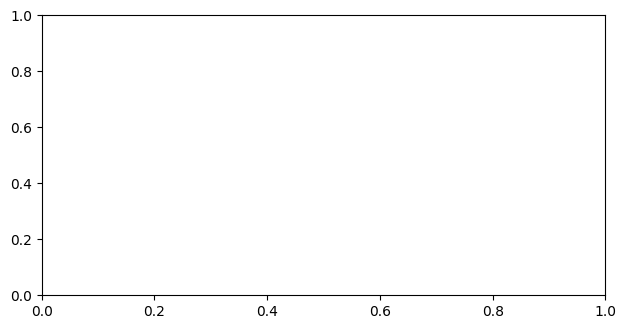

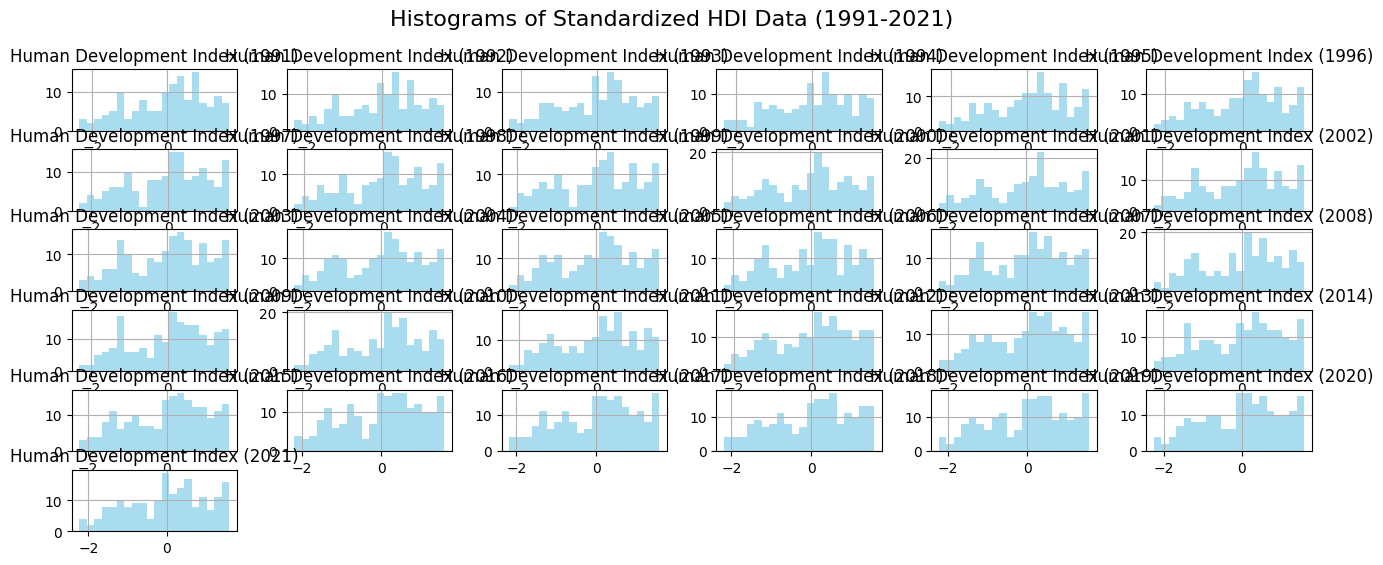

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(analysis_df), columns=hdi_columns)

# Normalize the data
normalizer = MinMaxScaler()
df_normalized = pd.DataFrame(normalizer.fit_transform(analysis_df), columns=hdi_columns)

# Display standardized and normalized data for reference
print("\nStandardized Data:")
display(df_scaled.head())
print("\nNormalized Data:")
display(df_normalized.head())

# Plotting
plt.figure(figsize=(16, 8))

# 1. Histogram of Standardized Data
plt.subplot(2, 2, 1)
df_scaled.hist(bins=20, alpha=0.7, figsize=(16, 6), color='skyblue')
plt.suptitle("Histograms of Standardized HDI Data (1991-2021)", fontsize=16)



Text(0.5, 0.98, 'Histograms of Normalized HDI Data (1991-2021)')

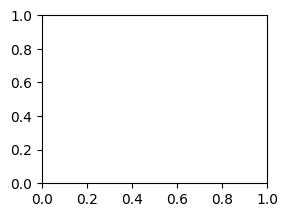

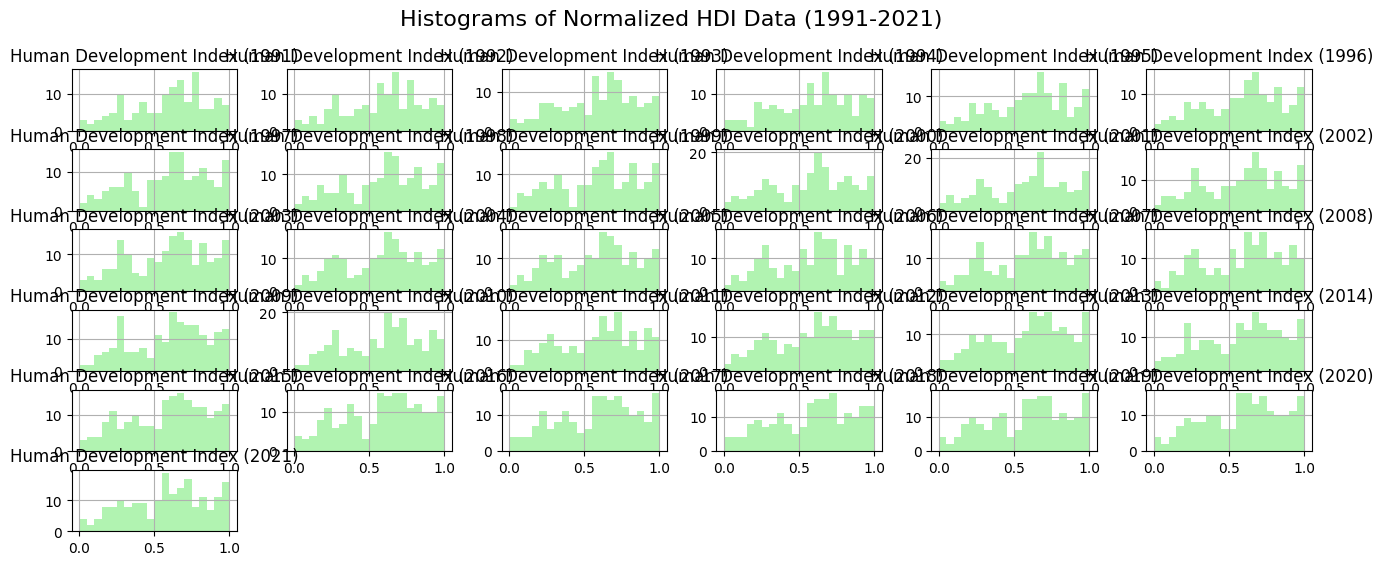

In [ ]:
# 2. Histogram of Normalized Data
plt.subplot(2, 2, 2)
df_normalized.hist(bins=20, alpha=0.7, figsize=(16, 6), color='lightgreen')
plt.suptitle("Histograms of Normalized HDI Data (1991-2021)", fontsize=16)


Text(0.5, 1.0, 'Boxplot of Standardized HDI Data (1991-2021)')

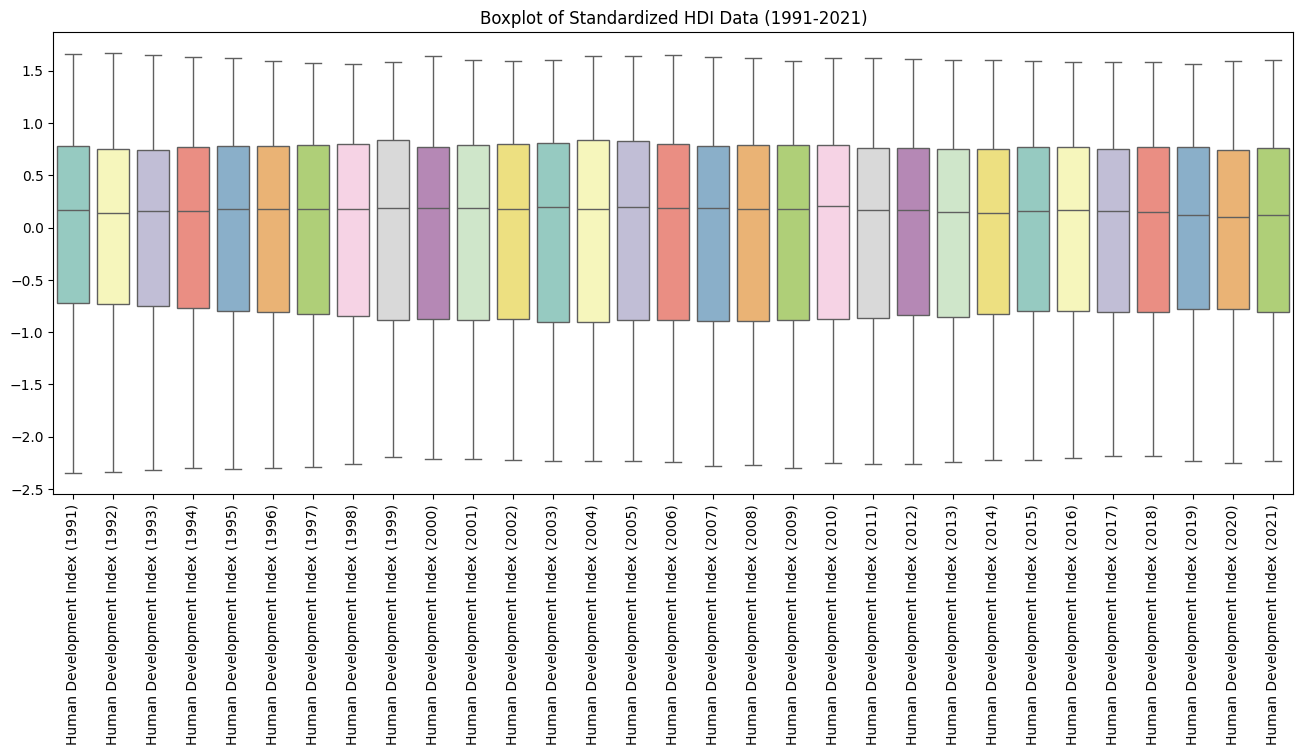

In [ ]:

# 3. Boxplot of Standardized Data (Boxplot for each year)
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_scaled, palette="Set3")
plt.xticks(rotation=90)
plt.title("Boxplot of Standardized HDI Data (1991-2021)")



Text(0.5, 1.0, 'Boxplot of Normalized HDI Data (1991-2021)')

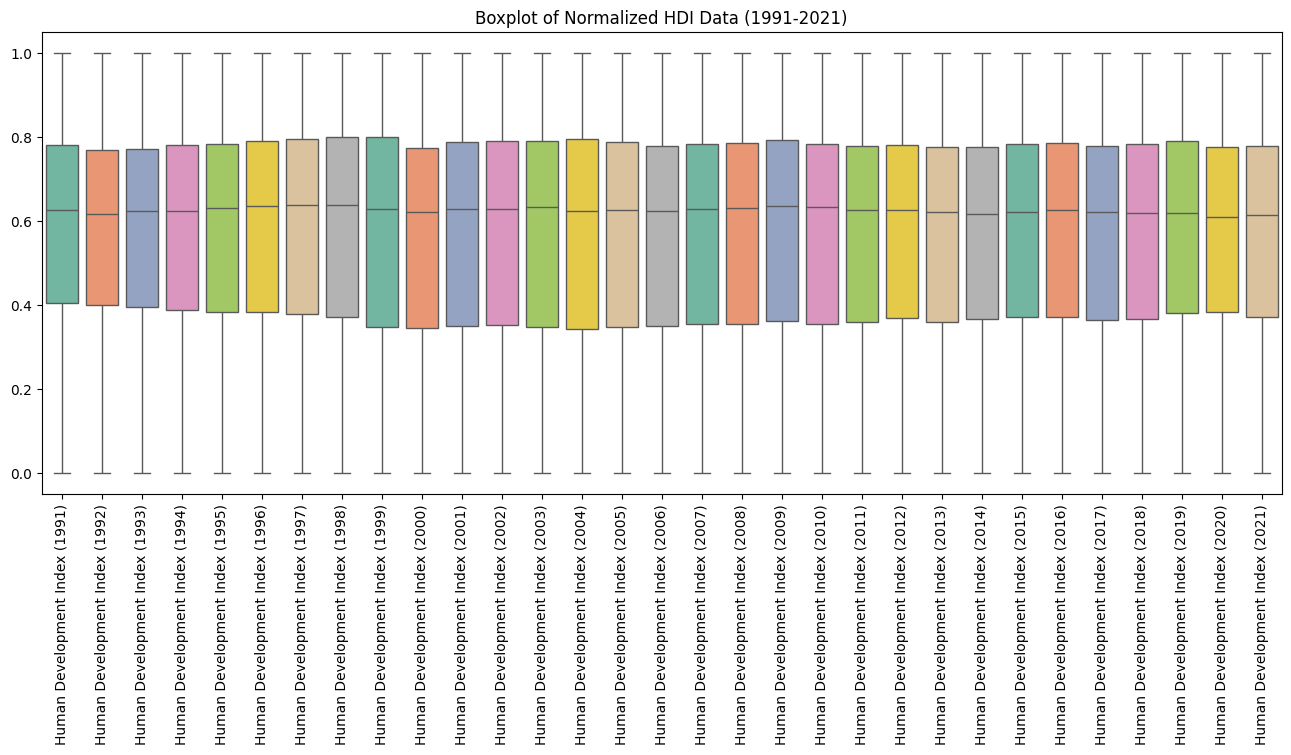

In [ ]:
# 4. Boxplot of Normalized Data (Boxplot for each year)
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_normalized, palette="Set2")
plt.xticks(rotation=90)
plt.title("Boxplot of Normalized HDI Data (1991-2021)")



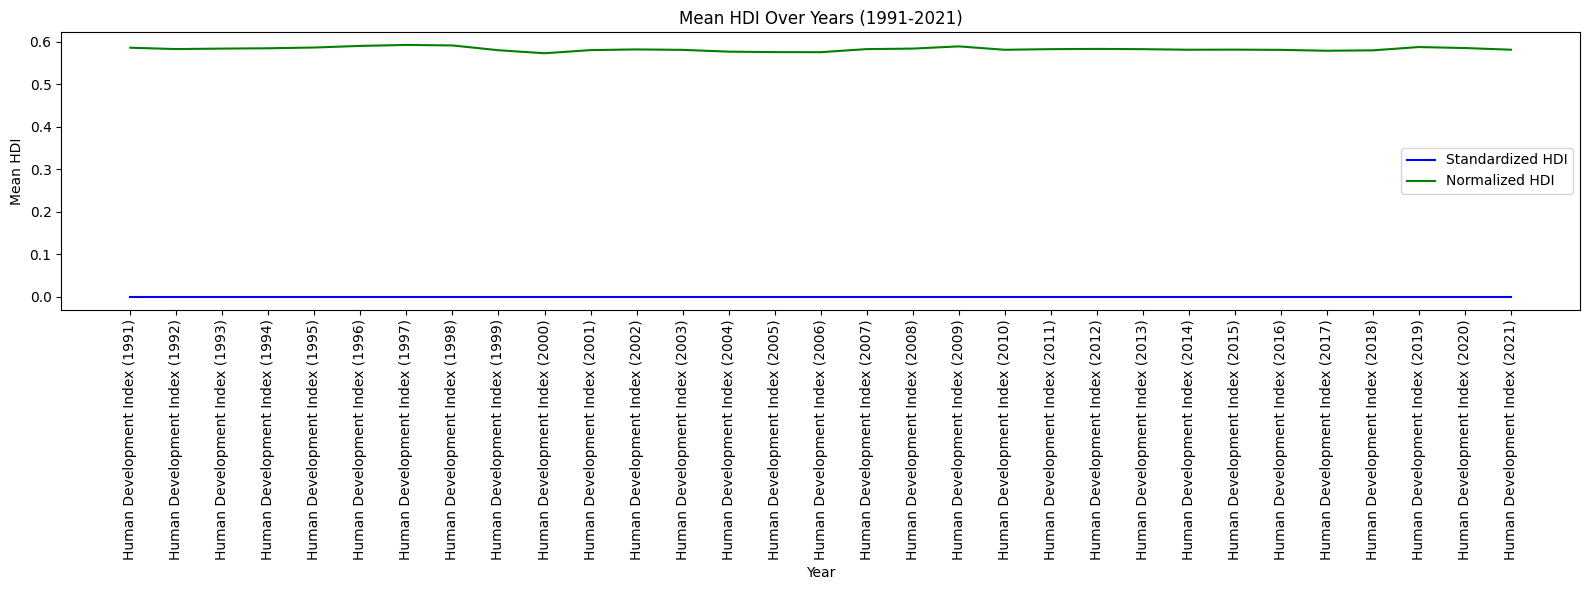

In [ ]:
# 5. Line plot of Mean HDI over Years for Standardized and Normalized Data
plt.figure(figsize=(16, 6))
plt.plot(df_scaled.mean(), label="Standardized HDI", color='blue')
plt.plot(df_normalized.mean(), label="Normalized HDI", color='green')
plt.title("Mean HDI Over Years (1991-2021)")

plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Mean HDI")
plt.legend()

plt.tight_layout()
plt.show()